# TEST - 1

Epoch 1/15


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


117/117 - 28s - 241ms/step - accuracy: 0.6269 - loss: 0.9966 - val_accuracy: 0.7052 - val_loss: 0.6722 - learning_rate: 0.0010
Epoch 2/15
117/117 - 24s - 201ms/step - accuracy: 0.7847 - loss: 0.5204 - val_accuracy: 0.7546 - val_loss: 0.5311 - learning_rate: 0.0010
Epoch 3/15
117/117 - 24s - 208ms/step - accuracy: 0.8457 - loss: 0.3882 - val_accuracy: 0.7492 - val_loss: 0.5260 - learning_rate: 0.0010
Epoch 4/15
117/117 - 23s - 195ms/step - accuracy: 0.8725 - loss: 0.3184 - val_accuracy: 0.7481 - val_loss: 0.5843 - learning_rate: 0.0010
Epoch 5/15
117/117 - 23s - 193ms/step - accuracy: 0.8951 - loss: 0.2719 - val_accuracy: 0.7433 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 6/15
117/117 - 25s - 210ms/step - accuracy: 0.9267 - loss: 0.2108 - val_accuracy: 0.7411 - val_loss: 0.7677 - learning_rate: 2.0000e-04
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step
LSTM Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.65      0.7

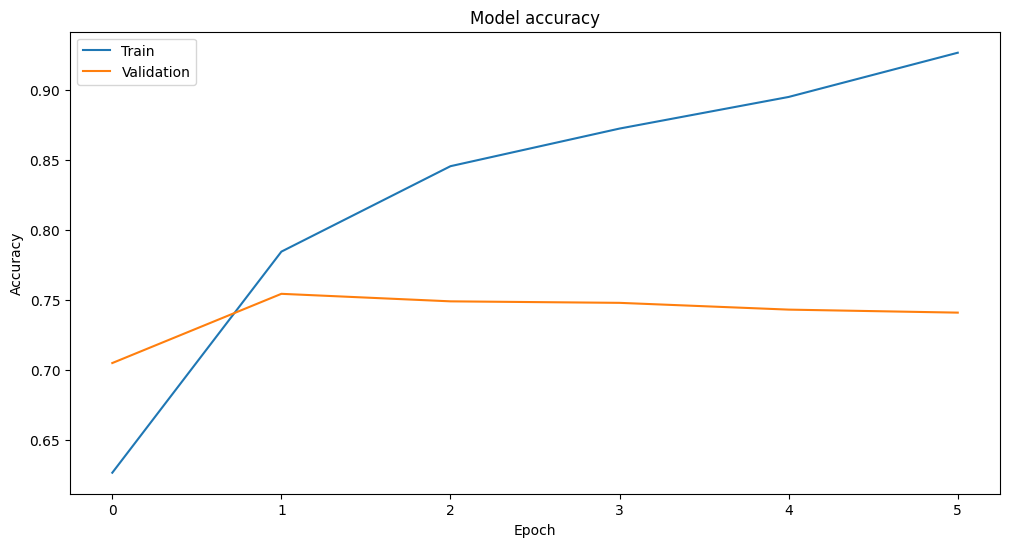

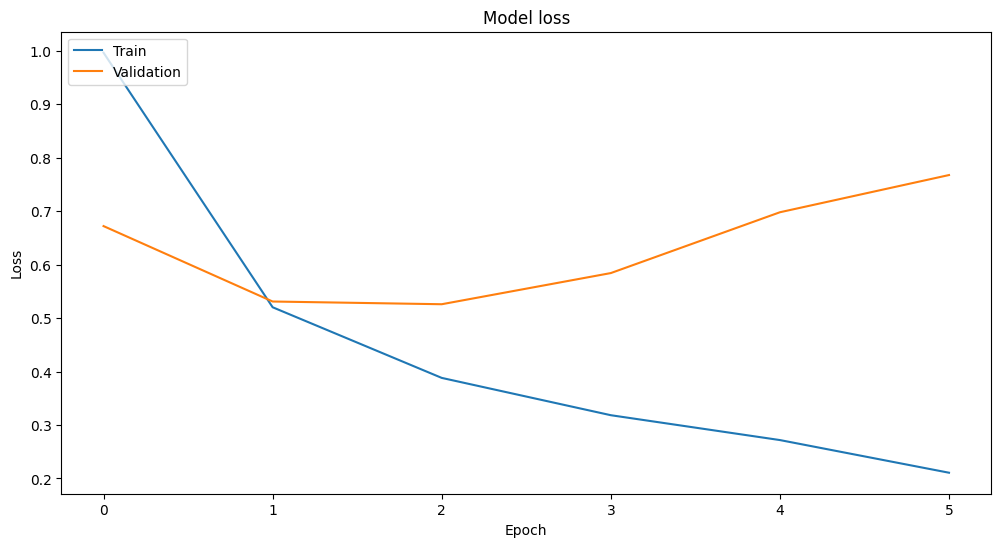

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix

# Defining the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Training the model
history = model.fit(X_train_pad, y_train, epochs=15, batch_size=64, validation_data=(X_test_pad, y_test), 
                    callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluating the model
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Printing performance metrics
print("LSTM Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# IMPROVISATION 1

Epoch 1/7


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


117/117 - 31s - 268ms/step - accuracy: 0.6345 - loss: 0.9981 - val_accuracy: 0.6992 - val_loss: 0.6761 - learning_rate: 0.0010
Epoch 2/7
117/117 - 26s - 223ms/step - accuracy: 0.7817 - loss: 0.5097 - val_accuracy: 0.7669 - val_loss: 0.5266 - learning_rate: 0.0010
Epoch 3/7
117/117 - 28s - 238ms/step - accuracy: 0.8430 - loss: 0.3793 - val_accuracy: 0.7411 - val_loss: 0.5279 - learning_rate: 0.0010
Epoch 4/7
117/117 - 27s - 235ms/step - accuracy: 0.8748 - loss: 0.3165 - val_accuracy: 0.7449 - val_loss: 0.5842 - learning_rate: 0.0010
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step
LSTM Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       944
           1       0.75      0.80      0.77       918

    accuracy                           0.77      1862
   macro avg       0.77      0.77      0.77      1862
weighted avg       0.77      0.77      0.77      1862

Accuracy: 0.7669172932330827
AUC-ROC: 0.7673068756692

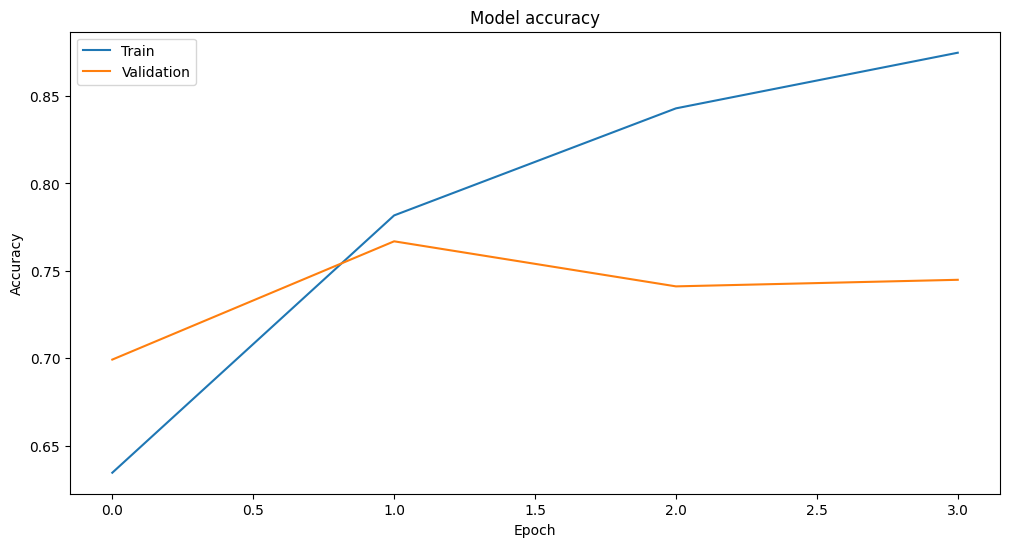

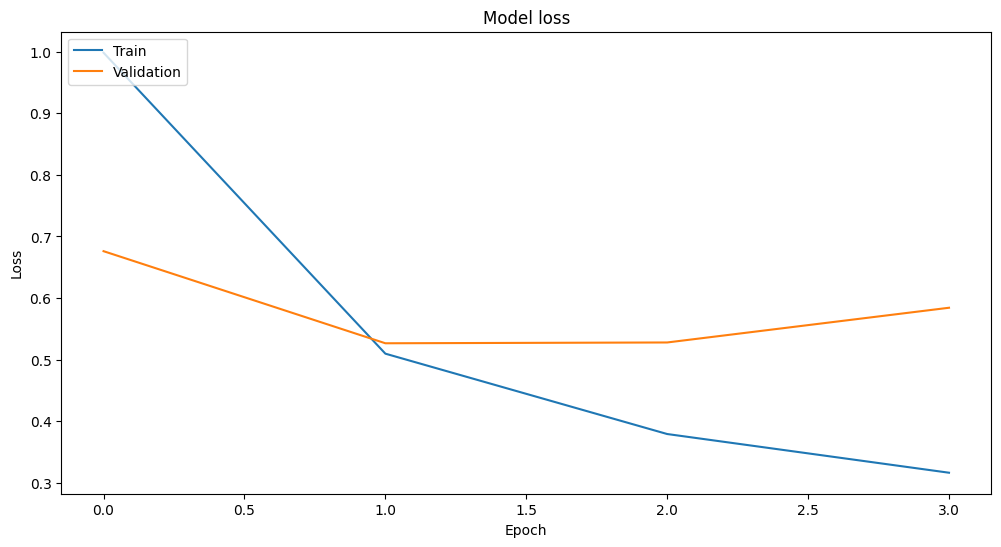

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Loading the dataset
train_df = pd.read_csv('Train_data.csv')
test_df = pd.read_csv('Test_data.csv')

X_train = train_df['clean_text']
y_train = train_df['IsHatespeech']
X_test = test_df['clean_text']
y_test = test_df['IsHatespeech']

# Tokenizing and pad sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Defining the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Training the model
history = model.fit(X_train_pad, y_train, epochs=7, batch_size=64, validation_data=(X_test_pad, y_test), 
                    callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluating the model
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Printing performance metrics
print("LSTM Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plotting training & validation - accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation - loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# IMPROVISATION 2


Epoch 1/10


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


117/117 - 74s - 631ms/step - accuracy: 0.5640 - loss: 0.6590 - val_accuracy: 0.7170 - val_loss: 0.5502 - learning_rate: 0.0010
Epoch 2/10
117/117 - 57s - 490ms/step - accuracy: 0.7722 - loss: 0.4899 - val_accuracy: 0.7567 - val_loss: 0.5060 - learning_rate: 0.0010
Epoch 3/10
117/117 - 55s - 470ms/step - accuracy: 0.8309 - loss: 0.3946 - val_accuracy: 0.7390 - val_loss: 0.5335 - learning_rate: 0.0010
Epoch 4/10
117/117 - 55s - 472ms/step - accuracy: 0.8696 - loss: 0.3232 - val_accuracy: 0.7476 - val_loss: 0.5765 - learning_rate: 0.0010
Epoch 5/10
117/117 - 56s - 475ms/step - accuracy: 0.9049 - loss: 0.2534 - val_accuracy: 0.7476 - val_loss: 0.6629 - learning_rate: 2.0000e-04
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step
LSTM Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       944
           1       0.74      0.78      0.76       918

    accuracy                           0.76      1862
   macro avg    

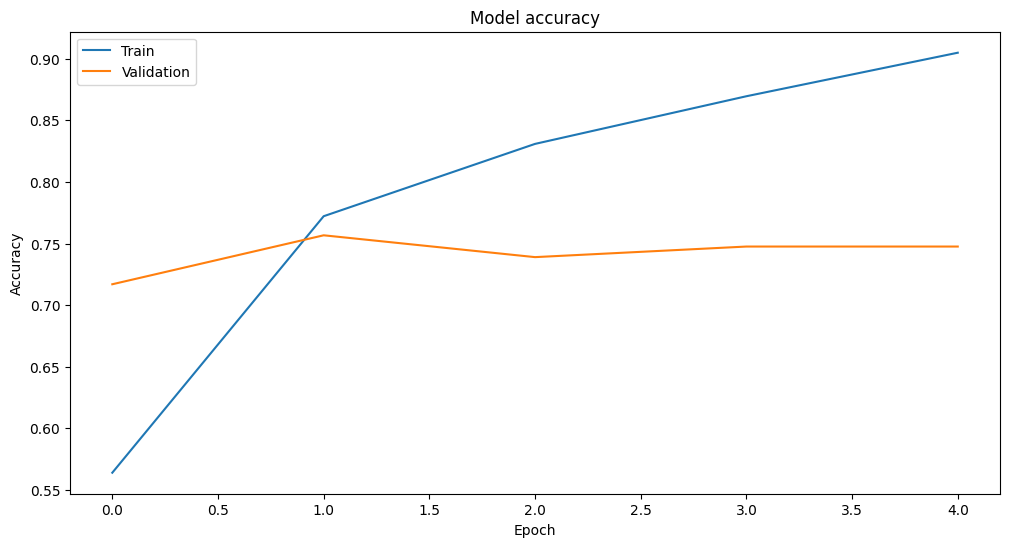

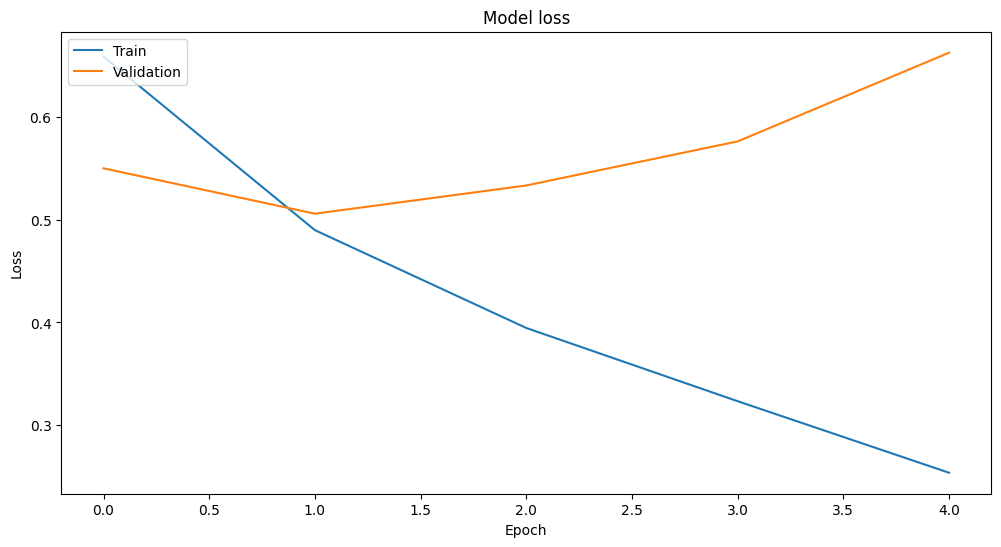

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Loading the dataset
train_df = pd.read_csv('Train_data.csv')
test_df = pd.read_csv('Test_data.csv')

X_train = train_df['clean_text']
y_train = train_df['IsHatespeech']
X_test = test_df['clean_text']
y_test = test_df['IsHatespeech']

# Tokenizing and pad sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Defining the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Training the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test), 
                    callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluating the model
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Printing performance metrics
print("LSTM Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# IMPROVISATION 3

Epoch 1/12


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


117/117 - 281s - 2s/step - accuracy: 0.6023 - loss: 0.6504 - val_accuracy: 0.7207 - val_loss: 0.5352 - learning_rate: 0.0010
Epoch 2/12
117/117 - 264s - 2s/step - accuracy: 0.7136 - loss: 0.5773 - val_accuracy: 0.7245 - val_loss: 0.5567 - learning_rate: 0.0010
Epoch 3/12
117/117 - 294s - 3s/step - accuracy: 0.7768 - loss: 0.5065 - val_accuracy: 0.7503 - val_loss: 0.5224 - learning_rate: 0.0010
Epoch 4/12
117/117 - 294s - 3s/step - accuracy: 0.7902 - loss: 0.4609 - val_accuracy: 0.7454 - val_loss: 0.5376 - learning_rate: 0.0010
Epoch 5/12
117/117 - 292s - 2s/step - accuracy: 0.8437 - loss: 0.3902 - val_accuracy: 0.7449 - val_loss: 0.5323 - learning_rate: 0.0010
Epoch 6/12
117/117 - 262s - 2s/step - accuracy: 0.8708 - loss: 0.3266 - val_accuracy: 0.7476 - val_loss: 0.5860 - learning_rate: 2.0000e-04
Epoch 7/12
117/117 - 277s - 2s/step - accuracy: 0.8872 - loss: 0.3061 - val_accuracy: 0.7379 - val_loss: 0.6321 - learning_rate: 2.0000e-04
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 406ms/step
LSTM Perf

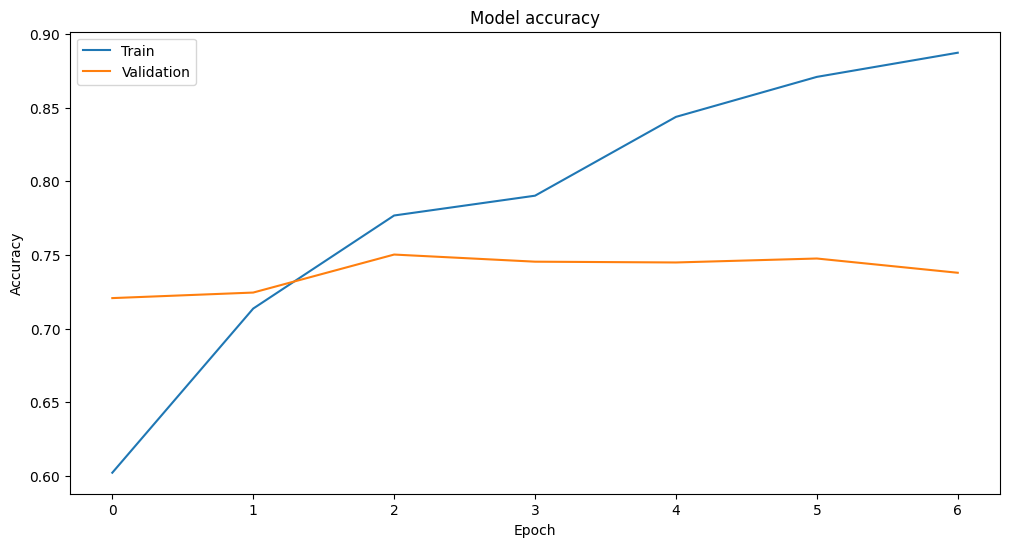

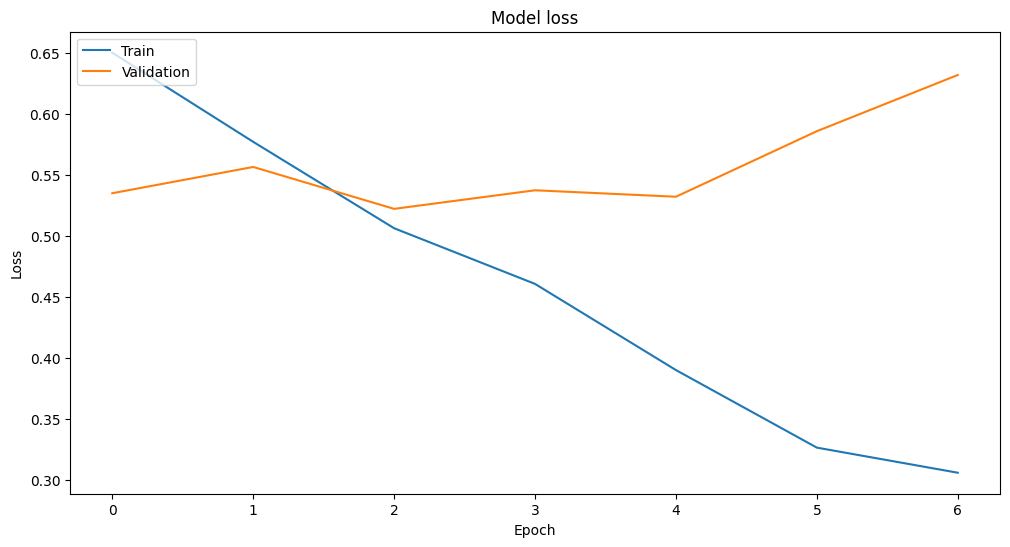

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Loading the dataset
train_df = pd.read_csv('Train_data.csv')
test_df = pd.read_csv('Test_data.csv')

X_train = train_df['clean_text']
y_train = train_df['IsHatespeech']
X_test = test_df['clean_text']
y_test = test_df['IsHatespeech']

# Tokenizing and pad sequences
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Defining the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(256, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(256, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Training the model
history = model.fit(X_train_pad, y_train, epochs=12, batch_size=64, validation_data=(X_test_pad, y_test), 
                    callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluating the model
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Printing performance metrics
print("LSTM Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## IMPROVED LSTM MODEL WITH REGULARIZATION, EARLY STOPPING AND OPTIMIZERS

Epoch 1/5


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


117/117 - 218s - 2s/step - accuracy: 0.6759 - loss: 0.5836 - val_accuracy: 0.7068 - val_loss: 0.5650 - learning_rate: 0.0010
Epoch 2/5
117/117 - 381s - 3s/step - accuracy: 0.8286 - loss: 0.3956 - val_accuracy: 0.7578 - val_loss: 0.5263 - learning_rate: 0.0010
Epoch 3/5
117/117 - 405s - 3s/step - accuracy: 0.8862 - loss: 0.2865 - val_accuracy: 0.7497 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 4/5
117/117 - 331s - 3s/step - accuracy: 0.9166 - loss: 0.2179 - val_accuracy: 0.7288 - val_loss: 0.6488 - learning_rate: 0.0010
Epoch 5/5
117/117 - 187s - 2s/step - accuracy: 0.9479 - loss: 0.1457 - val_accuracy: 0.7363 - val_loss: 0.8675 - learning_rate: 2.0000e-04
59/59 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step
LSTM Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75       944
           1       0.73      0.82      0.77       918

    accuracy                           0.76      1862
   macro avg       0.76      

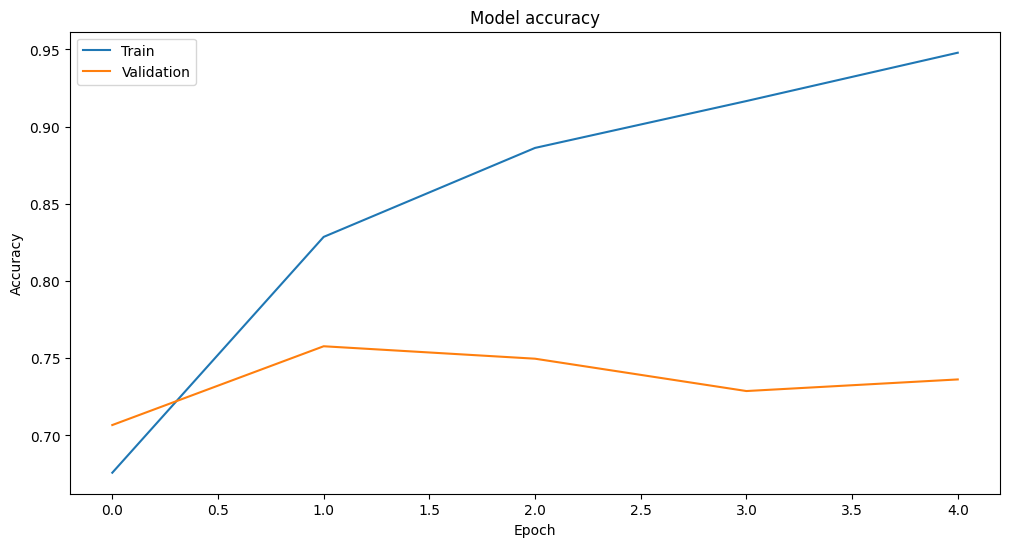

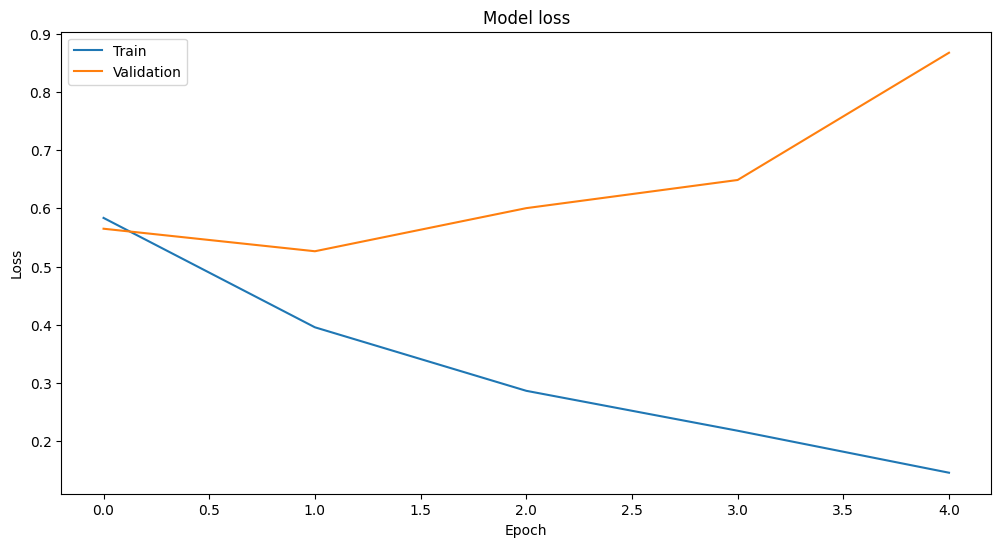

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Loading the data
train_df = pd.read_csv('Train_data.csv')
test_df = pd.read_csv('Test_data.csv')

X_train = train_df['clean_text']
y_train = train_df['IsHatespeech']
X_test = test_df['clean_text']
y_test = test_df['IsHatespeech']

# Tokenizing and pad sequences
max_words = 10000
max_len = 150
tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Defining the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=200, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Defining Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Training the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test), 
                    callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluating the model
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Performance metrics
print("LSTM Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Model Selection and Results

## Chosen Model: Improvisation 1

We chose to go with the model from **"IMPROVISATION 1"** since it showed the best results for benchmark tests. Here are the results:

### Model Performance on Test Data

#### LSTM Performance:

**Classification Report:**<br>

           precision    recall  f1-score   support

       0       0.79      0.74      0.76       944
       1       0.75      0.80      0.77       918

accuracy                           0.77      1862<br>
macro avg      0.77      0.77      0.77      1862<br>
weighted avg   0.77      0.77      0.77      1862<br>

- **Accuracy**: 0.7669
- **AUC-ROC**: 0.7673
- **Confusion Matrix**:<br>
[[698 246]<br>
[188 730]]
- **F1 Score**: 0.7709
- **Precision**: 0.7480
- **Recall**: 0.7952
